In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import json

In [5]:
celltype = 'NK'

with open(f'{celltype}_tuning.json', 'r') as f:
    result_dict = json.load(f)
result_dict.keys()

dict_keys(['Percentage', 'Prevalence', 'Other_prevalence', 'Feature_number', 'AUC', 'AUPR', 'MCC', 'Precision', 'F1 score', 'loss_history', 'error_history', 'log_lambda_range'])

In [73]:
def plot_target_other_pvl(result_dict, celltype, savepath=''):
    target_pvl = result_dict['Prevalence']
    other_pvl = result_dict['Other_prevalence']
    lmbd_range = np.exp(result_dict['log_lambda_range'])
    ratio = [target / (others + 1e-3) for target, others in zip(target_pvl, other_pvl)]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    ln1 = ax1.plot(lmbd_range, [100*p for p in target_pvl], marker='o', c = 'r', linestyle='--', label = 'Target Prevalence')
    ln2 = ax1.plot(lmbd_range, [100*p for p in other_pvl], marker='o', c = 'b', linestyle='--', label='Other Prevalence', zorder=1)
    ln3 = ax2.plot(lmbd_range, ratio, marker='o', c='orange', linestyle='--', label='Ratio')

    ax1.set_xlabel("lambda"); ax1.set_ylabel("Prevalence (%)")
    ax1.set(xscale="log")
    ax1.set_ylim(0, 110)
    ax2.set_ylabel('Ratio')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=[1, 1], loc='lower right')  #, bbox_to_anchor=(1.1, 0.5)
    plt.subplots_adjust(top=0.8)
    plt.title('Prevalence of '+ celltype)
    # plt.show()
    if savepath:
        plt.savefig(savepath, dpi=300)

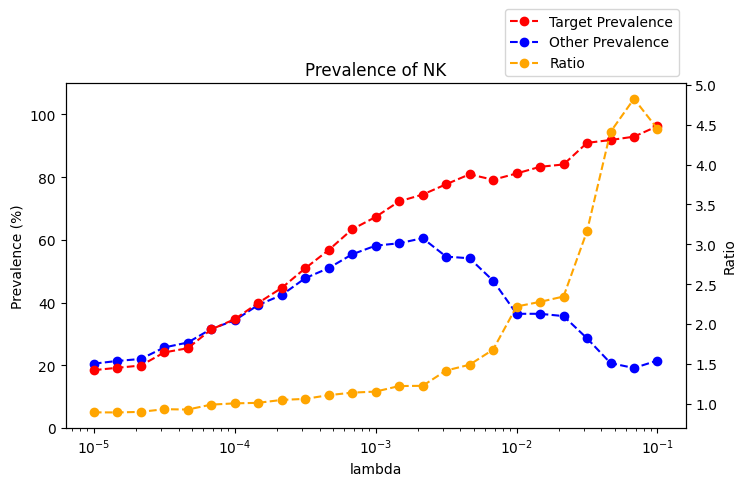

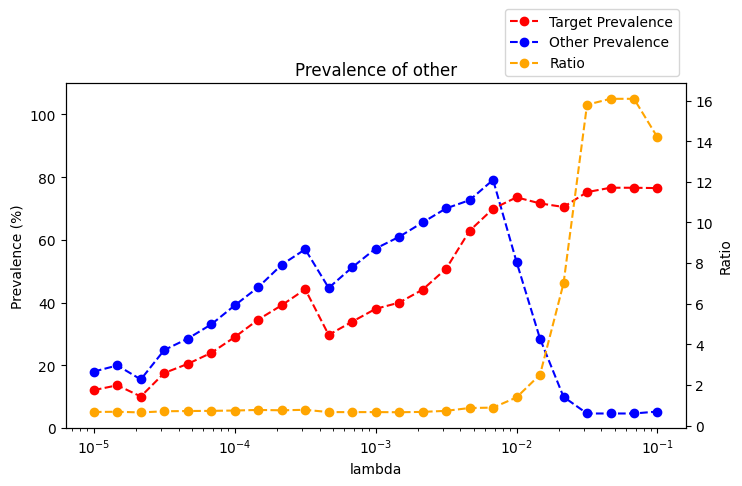

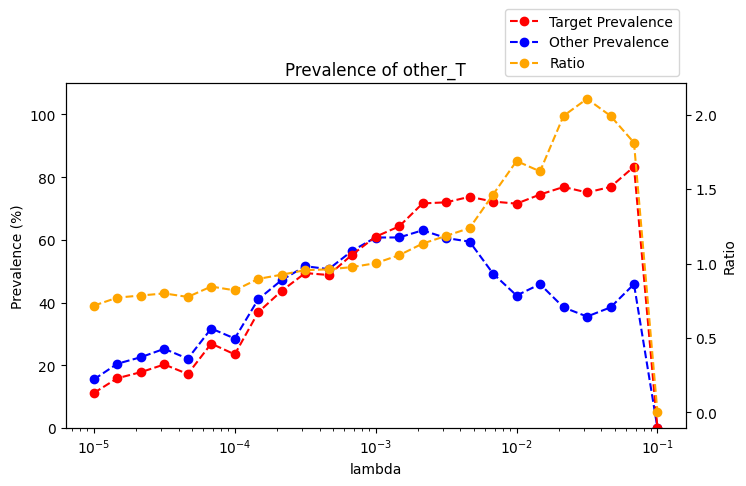

In [75]:
queue = ['NK', 'other', 'other_T']
path = r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_ztrans_v2\Level1.other_pvl\plot_target_other_pvl"

os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_ztrans_v2\Level1.other_pvl\tuning_result")
for celltype in queue:
    with open(f'{celltype}_tuning.json', 'r') as f:
        result_dict = json.load(f)
    
    plot_target_other_pvl(result_dict, celltype, savepath = path + f'\\{celltype}_target_other_pvl.png')